# MergeAdjacentImages Notebook

This notebook contains a few examples of how to use the `MergeAdjacentImages` application from **TubeTK**. First, we will include Python's `os` package as well as `SimpleITK` (Python wrapping). We also set the TubeTK build directory variable `TUBETK_BUILD_DIR`:

In [16]:
import os
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib import cm

%pylab inline

TubeTK_BINARY_DIR = "/c/src/TubeTK-Release/TubeTK-build"
if 'TubeTK_BINARY_DIR' in os.environ:
    TubeTK_BINARY_DIR = os.environ['TubeTK_BINARY_DIR']
elif len(sys.argv) > 1:
    TubeTK_BINARY_DIR = sys.argv[1]

if not os.path.exists(TubeTK_BINARY_DIR):
    print('TubeTK_BINARY_DIR not found!')
    sys.exit(1)
    

Populating the interactive namespace from numpy and matplotlib


Next, we load the first input image and show it's origin, spacing, etc.:

In [17]:
input_image1 = os.path.join(TubeTK_BINARY_DIR, 'MIDAS_Data/ES0015_Large.mha')
im0 = sitk.ReadImage(input_image1)
print im0.GetOrigin()
print im0.GetSpacing()
print im0.GetDirection()

(200.0, 200.0)
(1.0, 1.0)
(1.0, 0.0, 0.0, 1.0)


We get the `numpy` array for the image and visualize it:

In [18]:
im_np0 = sitk.GetArrayFromImage(im0)

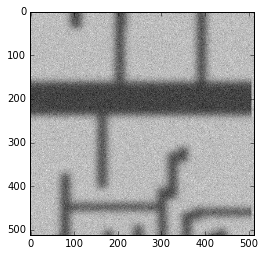

In [19]:
plt.imshow(im_np0, cm.gray)

Let's do the same for the second image:

In [20]:
input_image0 = os.path.join(TubeTK_BINARY_DIR, 'MIDAS_Data/ES0015_Large_Wo_offset.mha')
im1 = sitk.ReadImage(input_image0)
print im1.GetOrigin()
print im1.GetSpacing()
print im1.GetDirection()

(0.0, 0.0)
(1.0, 1.0)
(1.0, 0.0, 0.0, 1.0)


In [21]:
im_np1 = sitk.GetArrayFromImage(im1)

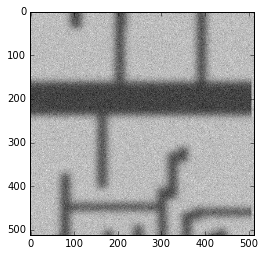

In [22]:
plt.imshow(im_np1, cm.gray)

Let's check if the spacing and direction are compatible:

In [23]:
im0.GetSpacing() == im1.GetSpacing() and im0.GetDirection() == im1.GetDirection()

True

We see that `im0` and `im1` are in fact compatible, but the origin of `im0` is at (200, 200).

## Merging - Example 1

In this example, we just want to merge our two images (**without registration**). Let's build the command-line arguments (The output image will be written to `/tmp/merged.mha`).

In [24]:
output_image = os.path.join(TubeTK_BINARY_DIR, 'Temporary/Python.MergeAdjacentImages-Ex1.mha')

cmd = [os.path.join(TubeTK_BINARY_DIR, 'bin/MergeAdjacentImages'),
       '-i 0', # Number of iterations ... here i=0, which means no registration,
       input_image0, # First image to merge
       input_image1, # Second image to merge
       output_image
      ]

Let's execute that command (via the `subprocess` module):

In [25]:
import subprocess
subprocess.call(cmd)

0

... and check if the output image `/tmp/merged.mha` was actually written to disk:

In [26]:
print os.path.exists(output_image)

True


We are now ready to visualize the result:

In [27]:
out_im = sitk.ReadImage(output_image)
print out_im.GetOrigin()
print out_im.GetSpacing()
print out_im.GetSize()

(0.0, 0.0)
(1.0, 1.0)
(712, 712)


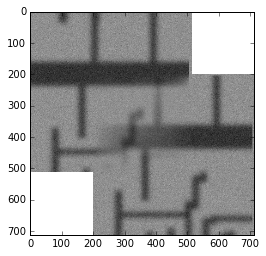

In [28]:
plt.imshow(sitk.GetArrayFromImage(out_im), cm.gray)

We see that the output image is larger by 212 pixel in both dimensions, since the second image's origin was at (200, 200) and the
image size of both images was 512 times 512 pixel.

## Merging - Example 2

We can also add some padding (e.g., 50 pixel on each side). For that we modify `cmd` as follows:

In [29]:
output_image = os.path.join(TubeTK_BINARY_DIR, 'Temporary/Python.MergeAdjacentImages-Ex2.mha')

cmd = [os.path.join(TubeTK_BINARY_DIR, 'bin/MergeAdjacentImages'),
       '-i 0', # Number of iterations ... here i=0, which means no registration,
       '-b 50,50', # This adds a white border around the second image (50 pixel each side)
       input_image0,
       input_image1,
       output_image
      ]

In [30]:
subprocess.call(cmd)

0

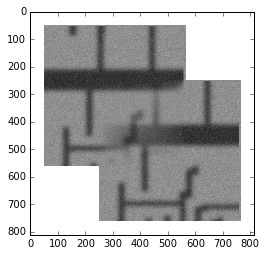

In [31]:
plt.imshow(sitk.GetArrayFromImage(sitk.ReadImage(output_image)), cm.gray)

## Merging - Example 3

Let's do the same example **WITH** rigid registration.

In [32]:
output_image = os.path.join(TubeTK_BINARY_DIR, 'Temporary/Python.MergeAdjacentImages-Ex3.mha')

cmd = [os.path.join(TubeTK_BINARY_DIR, 'bin/MergeAdjacentImages'),
       input_image1,
       input_image0,
       output_image
      ]

In [33]:
subprocess.call(cmd)

0

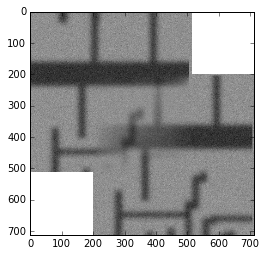

In [34]:
plt.imshow(sitk.GetArrayFromImage(sitk.ReadImage(output_image)), cm.gray)